# Preprocessing

In [2]:
import pandas as pd

In [3]:
currency_df = pd.read_csv('crypto_data.csv', index_col=0)
currency_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
#Discard all cryptocurrencies that are not being traded.
currency_df = currency_df[currency_df['IsTrading'] == True]
currency_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
#drop the IsTrading column from the dataframe
currency_df= currency_df.drop(columns = 'IsTrading')
currency_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#Remove all rows that have at least one null value
currency_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
currency_df = currency_df.dropna()
currency_df 

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Check to see if there are any nulls remaining
currency_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [9]:
#Filter for cryptocurrencies that have been mined. (total coins mined should be greater than zero)
currency_df = currency_df[currency_df["TotalCoinsMined"] > 0]
currency_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
#delete the CoinName from the original dataframe

currency_df= currency_df.drop(columns = 'CoinName')
currency_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
# dummies = pd.get_dummies(currency_df, columns = ['Algorithm', 'ProofType'],drop_first=True, dtype=float)
dummies = pd.get_dummies(currency_df, columns = ['Algorithm', 'ProofType'])
dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Standardize your dataset 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_currency = scaler.fit_transform(dummies)
scaled_currency

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

# Dimensionality Reduction


In [13]:
#dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=.90)

# Get principal components for the currency data.
currency_pca = pca.fit_transform(scaled_currency)

In [14]:
X_pca=pca.fit_transform(scaled_currency)

X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -3.54139871e-16, -1.87964870e-15,  7.72694650e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -7.14030330e-16, -1.98308314e-15,  1.14285762e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         5.21339139e-14,  4.68787767e-14, -1.96375075e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -4.73473804e-14,  3.81684380e-14,  3.00462186e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         2.21166619e-15, -2.20908796e-15, -1.68698356e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.40562122e-16, -2.74460958e-15, -1.84592533e-15]])

In [15]:
X_pca.shape

(532, 74)

C:\Users\Serj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


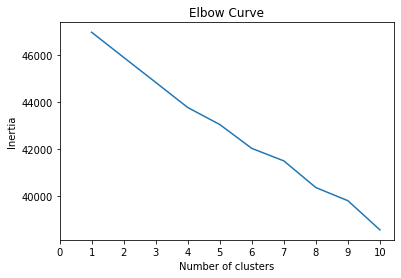

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# t-SNE

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(perplexity=20,learning_rate=50)
tsne_features = tsne.fit_transform(X_pca)
tsne_features.shape

(532, 2)

In [19]:
transformed_features  = tsne.fit_transform(tsne_features)
transformed_features

array([[ -7.1631365, -10.399861 ],
       [-13.6793785,   3.6764047],
       [-20.66445  ,  16.5339   ],
       ...,
       [ -5.679312 ,  26.8029   ],
       [ 28.141275 ,   5.5435996],
       [  8.952779 , -27.492962 ]], dtype=float32)

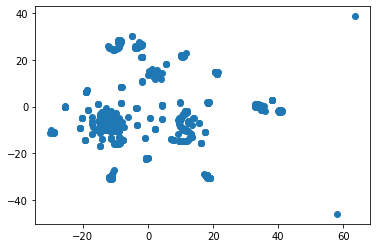

In [20]:
plt.scatter(tsne_features[:, 0], tsne_features[:,1])
plt.show()

C:\Users\Serj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


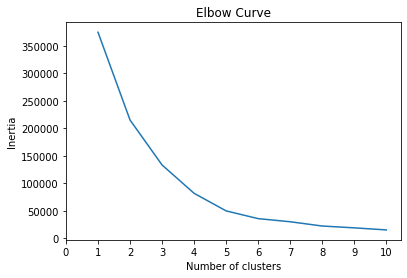

In [21]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
X_pca_tsne = pd.DataFrame(tsne_features)

In [23]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [24]:
clusters = get_clusters(4, X_pca_tsne)
clusters

,0,1,class
0,11.856790,-1.652846,0
1,12.205617,-14.326406,0
2,17.329924,-28.765566,0
3,32.902782,0.077816,3
4,-25.352112,-0.356589,2
...,...,...,...
527,35.901333,-1.818107,3
528,11.634773,-10.271310,0
529,-11.080500,-30.307873,2
530,-29.111120,-10.862052,2


In [25]:
clusters = pd.DataFrame(clusters)
clusters = clusters.rename(columns = {0:'1'})
clusters = clusters.rename(columns = {1:'2'})

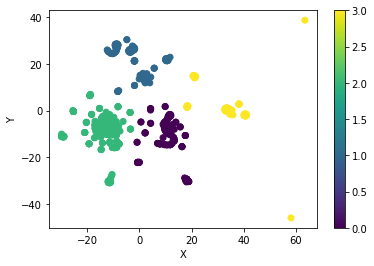

In [26]:
def show_clusters(df):
    plt.scatter(df["1"], df["2"], c=df['class'])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
show_clusters(clusters)

# Recommendations

Can cruptocurrencies be clustered together? Yes they can be

How many clusters? 4 seems to be a good fit for this model. By raising the perplexity to 50 you can get 5 clusters. 